# Auswertung 200218_2

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_2"
campaign_id    = "01_Messkampagne_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

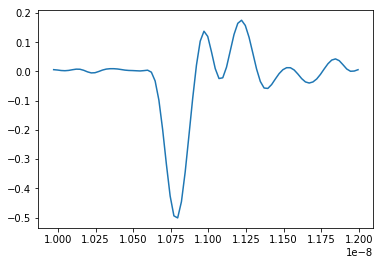

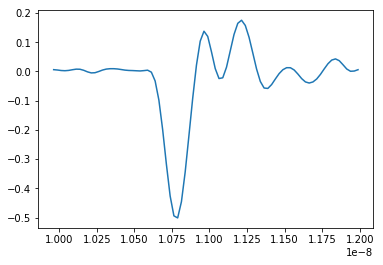

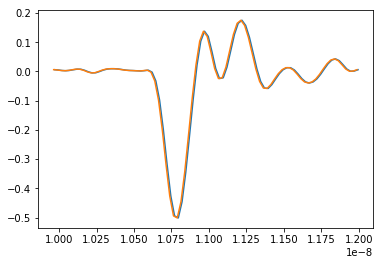

In [7]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

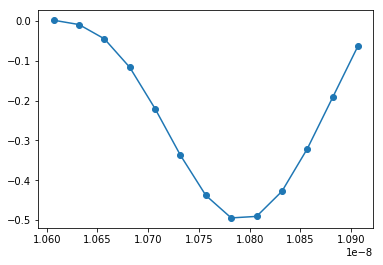

In [8]:
areaMinC1 = 25
areaMaxC1 = 38
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

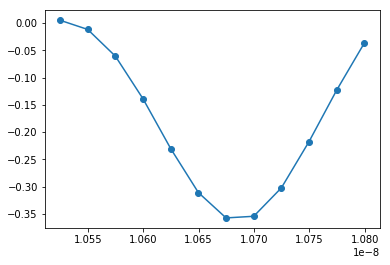

In [9]:
areaMinC3 = 22
areaMaxC3 = 34
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [10]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.078e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [11]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [12]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

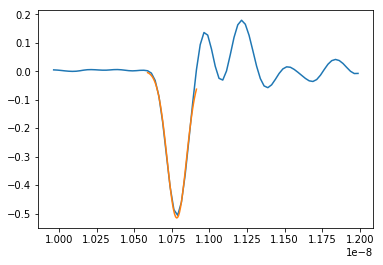

parameter: [-8.24479573e-11  1.07832347e-08  6.38062600e-11] [A, mu, sigma]


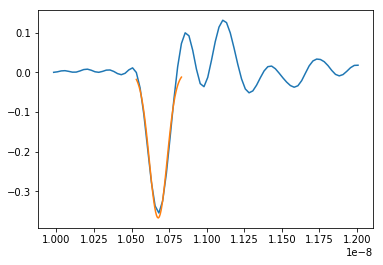

parameter: [-5.42122945e-11  1.06773254e-08  5.88783647e-11] [A, mu, sigma]


In [13]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

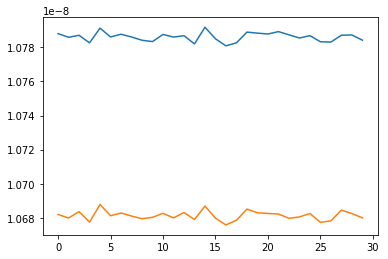

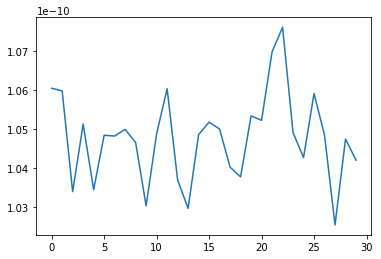

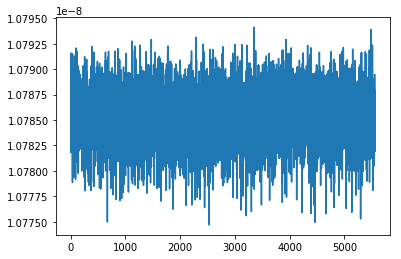

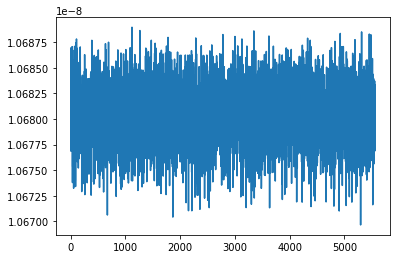

In [14]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [15]:
JitterGauss = jitter(C1, C3, axis = 1)

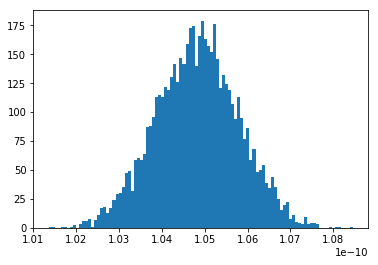

In [16]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

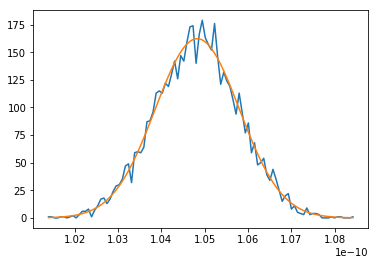

parameter: [3.95275068e-10 1.04827129e-10 9.71387821e-13] [A, mu, sigma]


In [17]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.14e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [18]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 0.9713878208638087 ps
σ_1: 0.6868749152948224 ps
σ_1 = σ_0 / sqrt(2)

μ: 104.82712890348505 ps

coma separated [σ_0, σ_1, μ]
9.713878208638087e-13,6.868749152948223e-13,1.0482712890348505e-10

 tab separated [σ_0, σ_1, μ]
9.713878208638087e-13	6.868749152948223e-13	1.0482712890348505e-10


## algorithm 2: min

In [19]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [20]:
factor = 0.5

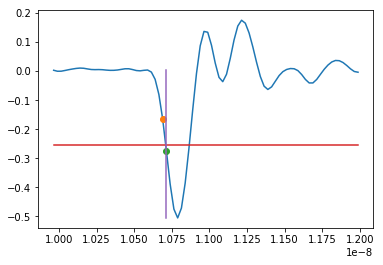

xt: 1.0709088406136843e-08 ps, yt -0.2527124409252792 ps


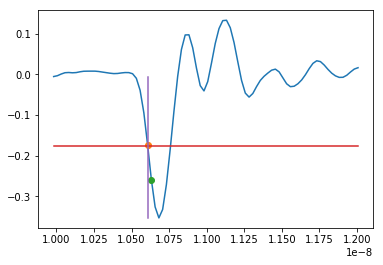

xt: 1.0607838614298096e-08 ps, yt -0.17642557920544277 ps


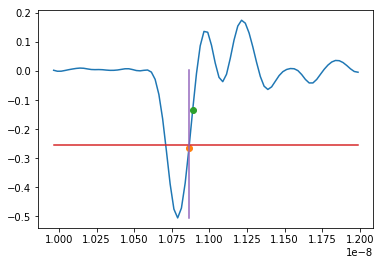

xt: 1.086651488253355e-08 ps, yt -0.2527124409252792 ps


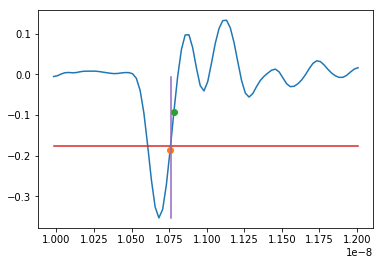

xt: 1.0759344189318464e-08 ps, yt -0.17642557920544277 ps


In [26]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [27]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [28]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

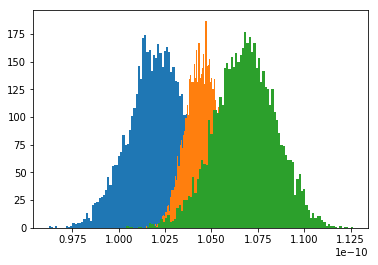

In [29]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

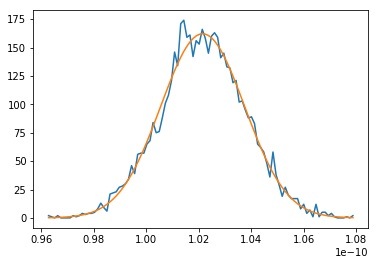

parameter: [6.49029980e-10 1.02154965e-10 1.59714574e-12] [A, mu, sigma]


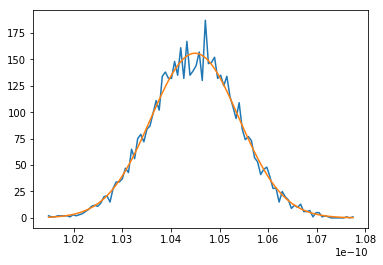

parameter: [3.53302018e-10 1.04493046e-10 9.04464876e-13] [A, mu, sigma]


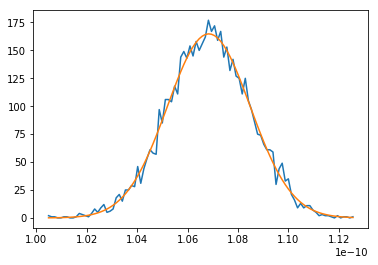

parameter: [6.77902944e-10 1.06842717e-10 1.64089700e-12] [A, mu, sigma]


In [31]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.02e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.05e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.07e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [35]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 1.5971457444361188 ps
σ_1: 1.1293525864340161 ps
σ_1 = σ_0 / sqrt(2)

μ: 102.15496462725953 ps

coma separated [σ_0, σ_1, μ]
1.5971457444361187e-12,1.1293525864340161e-12,1.0215496462725954e-10

 tab separated [σ_0, σ_1, μ]
1.5971457444361187e-12	1.1293525864340161e-12	1.0215496462725954e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 0.9044648758746489 ps
σ_1: 0.6395532470760131 ps
σ_1 = σ_0 / sqrt(2)

μ: 104.49304564410168 ps

coma separated [σ_0, σ_1, μ]
9.044648758746488e-13,6.395532470760132e-13,1.0449304564410168e-10

 tab separated [σ_0, σ_1, μ]
9.044648758746488e-13	6.395532470760132e-13	1.0449304564410168e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 1.640896997161181 ps
σ_1: 1.160289393921314 ps
σ_1 = σ_0 / sqrt(2)

μ: 106.8427165666297 ps

coma separated [σ_0, σ_1, μ]
1.640896997161181e-12,1.160289393921314e-12,1.068427165666297e-10

 tab separated [σ_0, σ_1, μ]
1.640896997161181e-12	1.160289